<style>
th {background-color:#55FF33;}
td {background-color:#00FFFF;}
</style>

<img align="right" style="max-width: 200px; height: auto" src="01_images/logo.png">

## Lab 01 - Rule-Based Audit Data Analytics

Audit Data Analytics in Python, University of St.Gallen (HSG), January 13th, 2020

The lab environment of the **"Audit Data Analytics Course"** at the University of St. Gallen (HSG) is based on Jupyter Notebooks (https://jupyter.org), which allow to perform a variety of statistical evaluations and data analyses.

<img align="center" style="max-width: 900px; height: auto" src="01_images/banner.png">

In the last lab, we learned about the basic functionality of Jupyter Notebooks. In this lab, we will use Jupyter Notebook to delve into some elements of the revisited data analysis process. The main goal of this lab here is to exemplarily perform the steps of a data import, a data validation as well as a data analysis based on a concrete example.

<img align="center" style="max-width: 800px; height: auto" src="01_images/process.png">

As always, pls. don't hesitate to ask all your questions either during the lab or send us an email via marco (dot) schreyer (at) unisg (dot) ch.

## Lab Objectives:

After today's lab, you should be able to:

> 1. Understand how to perform auditing data analysis using **Jupyter** and **Python**.
> 2. Use the **Pandas** library to analyze a variety of transactional data in a targeted manner.
> 3. Use the **Matplotlib** library to create custom data visualizations.
> 4. Develop initial **more concrete ideas** for possible data analyses within your company or institution.

But before we start let's watch a brief motivational video published by the **American Institute of Certified Public Accountants (AICPA)** in 2019 on the application of Jupyter Notebooks and the Python Programming language in Financial Statement Audits: 

In [67]:
from IPython.display import YouTubeVideo
# AICPA: Upgrade the Financial Statement Audit with Audit Data Analytics
# YouTubeVideo('kHY-Ioq_InA', width=1024, height=576)

## Setup of the Jupyter Notebook Environment

In analogy to our introductory lab, it is first necessary again to import some Python libraries that allow us to perform data acquisition, data analysis and data visualization. In this lab, we will specifically use the following three libraries (1) **Pandas** (https://pandas.pydata.org), (2) **NumPy** (https://numpy.org) and (3) **Matplotlib** (https://matplotlib.org) in the context of data visualization.

Let's import the `Pandas` and the `NumPy` libraries accordingly by executing the following `import` statements:

In [2]:
import pandas as pd
import numpy as np

In addition, we import a couple of `Python's` utility libraries:

In [3]:
import os # allows to create, access and manipulate data directories
import datetime as dt # allows for the create of data time stamps

We also import a set of `Python's` data access and import libraries: 

In [4]:
import io # allows to open and access streams of data
import zipfile # allows to zip and unzip data
import urllib # allows to handle website requests

Finally, import the `Matplotlib` and `Seaborn` plotting libraries and set the general data visualization parameters:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# set global data visualization parameters
plt.style.use('seaborn') # set the plotting style
plt.rcParams['figure.figsize'] = [5, 3] # set the plot figure size
plt.rcParams['figure.dpi']= 150 # set the plotting resolution

Enable the "inline plotting" of visualizations within the current notebook:

In [6]:
%matplotlib inline

Create notebook folder structure to store the original data as well as the analysis results:

In [7]:
if not os.path.exists('./02_data'): os.makedirs('./02_data')  # create data directory
if not os.path.exists('./03_results'): os.makedirs('./03_results')  # create results directory

Filter and suppress potential library warnings, for example due to library enhancements: 

In [8]:
import warnings

# set the warning filter flag to ignore warnings
warnings.filterwarnings('ignore')

## 1. Dataset Download and Data Import

The synthetic **PaySim** dataset simulates mobile money transactions based on real transactions extracted from one month of financial logs of a mobile financial service provider implemented in an African country. The original logs were provided by a multinational company that provided mobile financial services. At the time the data was published, the service provider operated in more than 14 countries worldwide.

The latest version of the dataset was published at the Kaggle Data Science Competitions website on April 3th, 2017 by the Norwegian University of Science and Technology (NTNU)

In total, the **PaySim** dataset comprises a population of **6.3 million logged transactions**. Each transaction contains **nine different attributes (features)**. The attribute names and their respective semantic meaning is given below:

>- `Step:` Denotes the current hour of time. In total 744 hours (30 simulation days).
>- `Type:` Denotes the type of the transaction. In total 5 different transaction types.
>- `Amount:` Indicates the amount transferred in local currency.

>- `NameOrig:` Identifies the (anonymized) ID of the sender who ordered the transaction.
>- `OldBalanceOrg:` Denotes the initial balance of the sender's account before the transaction.
>- `NewBalanceOrg:` Indicates the new balance of the sender's account after the transaction.

>- `NameDest:` Denotes the (anonymized) ID of the recipient of the transaction.
>- `OldBalanceOrg:` Denotes the initial account balance of the recipient before the transaction.
>- `NewBalanceOrg:` Denotes the new balance of the recipient's account after the transaction has taken place.

In addition, each transaction is marked with the following **two additional flags**:

>- `isFraud:` Indicates actual "fraudulent" transactions.
>- `isFlaggedFraud:` Indicates fraudulent transactions detected by the system.

Further details of the dataset, as well as the dataset itself, can be obtained via the following publication:

*E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016* 

or the following website on Kaggle: https://www.kaggle.com/ntnu-testimon/paysim1.

Now let's import a partial extract of the previously described data set consisting of **2,770,409 logged transactions** into the notebook. To do this, we first define the path or URL of the transaction data to be imported: 

In [9]:
url = 'https://raw.githubusercontent.com/GitiHubi/courseACA/master/lab01/02_data/transactions.zip'

In a next step we will open an URL open request to read the data from the provided URL:

In [10]:
request = urllib.request.urlopen(url)

Furthermore, we will retrieve the ZIP archive of the data from the opened URL request:

In [11]:
datazip = zipfile.ZipFile(io.BytesIO(request.read()))

Finally, we will extract the `transactions.csv` file contained in the ZIP archive and read it as a Comma Separated Value (CSV) into `Pandas` dataframe:

In [12]:
# open and unzip the ZIP archive
csv_file = datazip.open('transactions.csv')

# read the csv data as pandas dataframe
data = pd.read_csv(csv_file)

Review the first 10 transactions (rows) of the data set:

In [13]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
5,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
6,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
7,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0
8,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
9,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0


Review the last 10 transactions (rows) of the data set:

In [14]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2770399,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
2770400,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
2770401,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
2770402,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
2770403,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
2770408,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## 2. Data Validation and Data Assessment

The process of **data validation** is a crucial element in the run-up to any audit data analysis process. 

It creates confidence in the completeness and accuracy of the data being analyzed. The **structural** and **semantic** data validation of the data to be analyzed is necessary to mitigate any analysis errors. The lack of initial validation of the data being analyzed creates an increased risk of erroneous analysis results and the conclusions and decisions derived from them. Let's now start an exemplary data validation procedure.

### 2.1. Assignment of Unique Transaction Identifiers

A unique **transaction identifier** is used within the dataset to uniquely mark individual records in order to uniquely identify them in the further analysis procedure. Such a unique identifies is often comprised of a sequence of values selected so that each row in the dataset has a unique identifying characteristic.

Let's now generate such a unique sequence of transaction identifiers using the following naming convention `ACA_ID_0000001`, `ACA_ID_0000002`,..., `ACA_ID_2770408`:

In [15]:
# create list of numeric values 0, 1, 2, ..., N
ids = list(range(0, data.shape[0]))

# create list of unique transaction identifier
keys = ['ACA_ID_' + str(e).zfill(7) for e in ids]

Subsequently, let's verify the first five created unique transaction identifier:

In [16]:
keys[0:5]

['ACA_ID_0000000',
 'ACA_ID_0000001',
 'ACA_ID_0000002',
 'ACA_ID_0000003',
 'ACA_ID_0000004']

Ok, that looks like anticipated. Let's now add the unique transaction identifiers to the original dataset we aim to investigate in the following. Thereby, we will add a designated and leading `AUDIT_ID` column to our dataframe using the `insert` statement available in the `Pandas` library:

In [17]:
data.insert(0, "AUDIT_ID", keys)

Let's verify if the `AUDIT_ID` column including the unique identifier was successfully created by inspecting the first 10 rows of the dataframe containing the transaction data:

In [18]:
data.head(10)

,AUDIT_ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,ACA_ID_0000000,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
1,ACA_ID_0000001,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
2,ACA_ID_0000002,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
3,ACA_ID_0000003,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
4,ACA_ID_0000004,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
5,ACA_ID_0000005,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
6,ACA_ID_0000006,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
7,ACA_ID_0000007,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0
8,ACA_ID_0000008,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
9,ACA_ID_0000009,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0


Again, let's also inspect the last 10 rows of the dataframe containing the transaction data:

In [19]:
data.tail(10)

,AUDIT_ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2770399,ACA_ID_2770399,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
2770400,ACA_ID_2770400,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
2770401,ACA_ID_2770401,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
2770402,ACA_ID_2770402,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
2770403,ACA_ID_2770403,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
2770404,ACA_ID_2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
2770405,ACA_ID_2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
2770406,ACA_ID_2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
2770407,ACA_ID_2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
2770408,ACA_ID_2770408,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


Excellent, now that we assigned each row in our dataset a unique identifier let's continue with the structural data validation. 

### 2.2. Structural Data Validation

The **structural data validation** validates whether the received data show technical inconsistencies ("gaps") between the expected data population and the actually received data population, e.g. missing records or formatting errors. The primary objective here is to ensure the technical completeness and integrity of the received data.

Let's now conduct a simple structural validation of the retrieved transactional data. Let's therefore, in a first step, validate the dimensionality of the data. Thereby, we start with the verification of the number of contained transactions (rows) using the `shape` function of the `Pandas` library:

In [20]:
data.shape[0]

2770409

Now, let's validate the number of attributes (columns) contained in the transactional data using again the `shape` function of the `Pandas` library:

In [21]:
data.shape[1]

12

Finally. let's also verify the data types of the distinct data attributes. Thereby, the distinct data types are defined according to the following specifications:

>- `int64`:  denotes full `integer` number values.
>- `object`:  denotes text or mixed numeric and non-numeric values.
>- `float64`: denotes floating point `float` number values.

The data types of the distinct attributes can be obtained using the `dtypes` function of the `Pandas`library:

In [22]:
data.dtypes

AUDIT_ID           object
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### 2.3. Semantic Data Validation

The **semantic data validation** validates whether the received data shows semantic inconsistencies ("discrepancies") between the expected data population and the actually received data population, e.g. unusual or incorrect field characteristics. The primary objective here is to ensure the semantic completeness and consistency of the received data.

#### 2.3.1 Semantic Validation of Individual Attribute Value Characteristics

Let's now conduct a simple semantic validation of the retrieved transactional data. Let's therefore, in a first step, validate the values of the individual attributes. Thereby, we start with the verification of unique attribute values per individual attribute using the `nunique` function of the `Pandas` library:

In [23]:
data.nunique()

AUDIT_ID          2770409
step                  743
type                    2
amount            2685805
nameOrig          2768630
oldbalanceOrg      435702
newbalanceOrig     271977
nameDest           509565
oldbalanceDest    2360852
newbalanceDest    2562844
isFraud                 2
isFlaggedFraud          2
dtype: int64

Next, let's inspect the distinct value distributions of the individual numerical attributes using the `describe` function of the `Pandas` library:

In [24]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.420081e+02,3.175361e+05,4.764308e+04,1.609190e+04,1.703551e+06,2.049734e+06,2.964544e-03,5.775321e-06
std,1.416191e+02,8.877897e+05,2.513251e+05,1.512558e+05,4.225550e+06,4.676990e+06,5.436687e-02,2.403183e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,8.297354e+04,0.000000e+00,0.000000e+00,1.280734e+05,3.272891e+05,0.000000e+00,0.000000e+00
50%,2.360000e+02,1.712609e+05,3.039600e+02,0.000000e+00,5.557100e+05,8.280539e+05,0.000000e+00,0.000000e+00
75%,3.320000e+02,3.067912e+05,3.099700e+04,0.000000e+00,1.735900e+06,2.122198e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Let's also look at a brief example of determining the value counts of a particular data attribute using the `value_counts` function of the `Pandas` library:

In [25]:
data["type"].value_counts()

CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

Let's also visualize the obtained value counts to gain a more intuitive understanding of the count distribution using the plotting capabilities of the `Matplotlib` library:

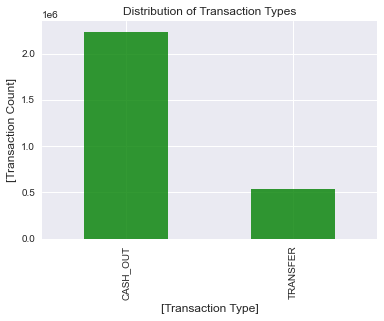

In [26]:
# initialize the plot
fig, ax = plt.subplots()

# plot a histogram of the value counts
data["type"].value_counts().plot(ax=ax, kind='bar', color="green", alpha=0.8)

# add labels of the x- and y-axis
plt.ylabel("[Transaction Count]", fontsize=12)
plt.xlabel("[Transaction Type]", fontsize=12)

# add plot title
plt.title("Distribution of Transaction Types", fontsize=12);

#### 2.3.2 Semantic Validation of Combined Attribute Value Characteristics

In a next step let's conduct a simple semantic validation of a combination of attributes contained in the retrieved transactional data. Thereby, we aim to investigate the number of distinct values of the combined data attributes `type` and `isFraud` of transactional data. This can be achieved using the `pivot_table` function of the `Pandas` library:

In [27]:
pd.pivot_table(data, values="step", index=["type"], columns=["isFraud"], aggfunc=np.size)

isFraud,0,1
type,,
CASH_OUT,2233384,4116
TRANSFER,528812,4097


Let's again visualize the obtained value counts to gain a more intuitive understanding of the combined count distribution using the plotting capabilities of the `Matplotlib` library:

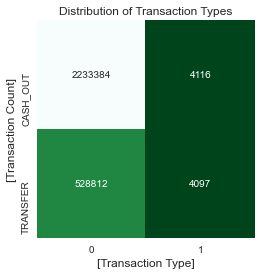

In [28]:
# initialize the plot
fig, ax = plt.subplots()

# create pivot table of "type" and "isFraud" field
pivot = pd.pivot_table(data, values="step", index=["type"], columns=["isFraud"], aggfunc=np.size)

# plot the pivot table as seaborn heatmap
sns.heatmap(pivot, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add labels of the x- and y-axis
plt.ylabel("[Transaction Count]", fontsize=12)
plt.xlabel("[Transaction Type]", fontsize=12)

# add plot title
plt.title("Distribution of Transaction Types", fontsize=12);

#### 2.3.3 Semantic Validation of Individual Transaction Type Attribute Value Characteristics

Now we will conduct a semantic validation of the amount field of transactions of type **"CASH_OUT"**. Let's therefore in a first step extract all "CASH_OUT" transactions from the dataset. To achieve this we will use the data filter capabilities of the `Pandas` library:

In [29]:
# filter and extraction of cash out transactions
transactions_cash_out = data[data["type"] == "CASH_OUT"]

Let's now verify the completeness of the filtered **"CASH_OUT"** transactions: 

In [30]:
transactions_cash_out.shape[0]

2237500

Next, we will visualize the posting amounts of each filtered **"CASH_OUT"** transactions vs. its corresponding process step:

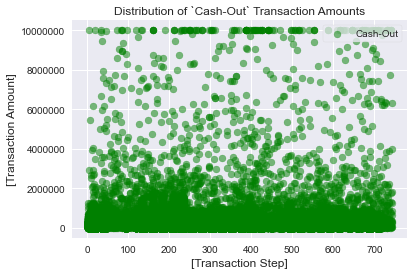

In [31]:
# initialize the plot
fig, ax = plt.subplots()

# plot the scatter plot of all cash out posting amounts
plt.scatter(transactions_cash_out["step"], transactions_cash_out["amount"], color="green", alpha=0.5, label="Cash-Out")

# add labels of the x- and y-axis
plt.ylabel("[Transaction Amount]", fontsize=12)
plt.xlabel("[Transaction Step]", fontsize=12)

# format y-axis tick labels
ax.ticklabel_format(style='plain')

# add plot legend
plt.legend(loc="upper right", frameon=True)

# add plot title
plt.title("Distribution of `Cash-Out` Transaction Amounts", fontsize=12);

Let's now in a second step extract all **"TRANSFER"** transactions from the dataset. To achieve this we will use the data filter capabilities of the `Pandas` library:

In [32]:
# filter and extraction of transfer transactions
transactions_transfer = data[data["type"] == "TRANSFER"]

Let's now verify the completeness of the filtered **"TRANSFER"** transactions: 

In [33]:
transactions_transfer.shape[0]

532909

Next, we will again visualize the posting amounts of each filtered **"CASH_OUT** transactions vs. its corresponding process step:

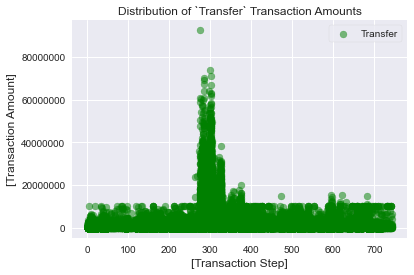

In [34]:
# initialize the plot
fig, ax = plt.subplots()

# plot the scatter plot of all cash out posting amounts
plt.scatter(transactions_transfer["step"], transactions_transfer["amount"], color="green", alpha=0.5, label="Transfer")

# add labels of the x- and y-axis
plt.ylabel("[Transaction Amount]", fontsize=12)
plt.xlabel("[Transaction Step]", fontsize=12)

# format y-axis tick labels
ax.ticklabel_format(style='plain')

# add plot legend
plt.legend(loc="upper right", frameon=True)

# add plot title
plt.title("Distribution of `Transfer` Transaction Amounts", fontsize=12);

## 3. Data Preparation and Formatting

**Data preparation** defines the cleaning and transformation of raw data prior to the actual processing and analysis. Data preparation is an important step before the actual data analysis to be performed and often involves reformatting data, correcting information, and combining data sets to enrich that data.

### 3.1. Formatting of Data Attributes

Let's conduct a simple semantic formatting of the data attributes `isFraud` and `isFlaggedFraud` in order to improve the interpretability of a human auditor. Therefore, let's first review the current formatting by inspecting the first five rows of the transactional dataset: 

In [35]:
transactions_cash_out.head(5)

,AUDIT_ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,ACA_ID_0000001,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
2,ACA_ID_0000002,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
5,ACA_ID_0000005,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
6,ACA_ID_0000006,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
7,ACA_ID_0000007,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0


It can be observed that the `isFraud` attribute encompasses two binary values. The values corresponding to either the value `1` which denotes a fraudulent transaction or the value `0` which denotes a non-fraudulent transaction. In a next step we will reformat those values accordingly in the dataset:

In [36]:
# filter for fraudulent transations and replace the "isFraud" flag value
transactions_cash_out.loc[transactions_cash_out['isFraud'] == 1, 'isFraud'] = 'yes' # replace the value "1" with "yes"

# filter for non-fraudulent transations and replace the "isFraud" flag value
transactions_cash_out.loc[transactions_cash_out['isFraud'] == 0, 'isFraud'] = 'no' # replace the value "0" with "no"

Let's spot check the performed replacement by the re-inspection of the first five rows:

In [37]:
transactions_cash_out.head(5)

,AUDIT_ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,ACA_ID_0000001,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,yes,0
2,ACA_ID_0000002,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,no,0
5,ACA_ID_0000005,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,no,0
6,ACA_ID_0000006,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,no,0
7,ACA_ID_0000007,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,no,0


Let's now apply the same reformatting to the `isFlaggedFraud` attribute in the dataset. Remember, the values corresponding to either the value 1 which denotes a transaction flagged as fraudulent or the value 0 which denotes a transaction flagged as non-fraudulent. 

In [38]:
# filter for transations flagged as fraudulent and replace the "isFlaggedFraud" flag value
transactions_cash_out.loc[transactions_cash_out['isFlaggedFraud'] == 1]['isFlaggedFraud'] = 'yes' # replace the value "1" with "yes"

# filter for transations flagged as non-fraudulent and replace the "isFlaggedFraud" flag value
transactions_cash_out.loc[transactions_cash_out['isFlaggedFraud'] == 0]['isFlaggedFraud'] = 'no' # replace the value "0" with "no"

Let's again spot check the performed replacement by the re-inspection of the first five rows:

In [39]:
transactions_cash_out.head(5)

,AUDIT_ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,ACA_ID_0000001,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,yes,0
2,ACA_ID_0000002,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,no,0
5,ACA_ID_0000005,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,no,0
6,ACA_ID_0000006,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,no,0
7,ACA_ID_0000007,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,no,0


## 4. Rule-Based ('Red-Flag') Audit Data Analytics

<img align="center" style="max-width: 800px; height: auto" src="01_images/analytics.png">

### 4.1. Analytics: Identification of Unusual High Round Payment Amounts

<p>
    <table class="table table-bordered table-striped table-hover">
    <col width="150">
        <tr>
            <td><b align="left" style="font-size:16px">ID: </b></td>
            <td><p align="left" style="font-size:16px">ACA 001</p></td>
        <tr>
            <td><b align="left" style="font-size:16px">Name: </b></td>
            <td><p align="left" style="font-size:16px">Unusual High Round Payment Amounts</p></td>
        <tr>
            <td><b align="left" style="font-size:16px">Risk: </b></td>
            <td><p align="left" style="font-size:16px">Unusual high round amount payments pose an increased risk of high financial losses.</p></td>
        </tr>
        <tr>
            <td><b align="left" style="font-size:16px">Hypothesis: </b></td>
            <td><p align="left" style="font-size:16px">Outgoing value should follow a general distributional pattern.</p></td>
        </tr>
        <tr>
            <td><b align="left" style="font-size:16px">Data: </b></td>
            <td><p align="left" style="font-size:16px">Population of the 2,237,500 "cash-out" transactions that comprise the 'PaySim' dataset.</p></td>
        </tr>
        <tr>
            <td><b align="left" style="font-size:16px">Analytics: </b></td>
            <td><p align="left" style="font-size:16px">Identification of all cash-out transactions with a transaction amount higher or equal to 10 million in local currency. Extraction of the relevant cash-out transactions from the 'PaySim' dataset for a sample based case-by-case review.</p></td>
        </tr>
    </table>
</p>

In order to conduct the analysis, let's again visually inspect the individual payment amounts of the entire population of 2,237,500 'CASH_OUT' transactions:

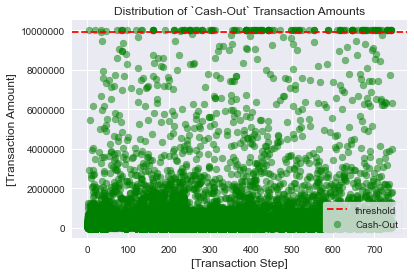

In [40]:
# initialize the plot
fig, ax = plt.subplots()

# plot the scatter plot of all cash out posting amounts
plt.scatter(transactions_cash_out["step"], transactions_cash_out["amount"], color="green", alpha=0.5, label="Cash-Out")

# plot unusual amount threshold
plt.axhline(y=9900000, color="r", linestyle="--", label="threshold")

# add labels of the x- and y-axis
plt.ylabel("[Transaction Amount]", fontsize=12)
plt.xlabel("[Transaction Step]", fontsize=12)

# format y-axis tick labels
ax.ticklabel_format(style='plain')

# add plot legend
plt.legend(loc="lower right", frameon=True)

# add plot title
plt.title("Distribution of `Cash-Out` Transaction Amounts", fontsize=12);

From the visualization it appears that there is an unusual pattern evident around the transaction amounts higher or equal to 10 Mio. in local currency. Let's therefore in a next step also visually inspect the distribution of all payments that exhibit an amounts higher than 1 Mio. in local currency: 

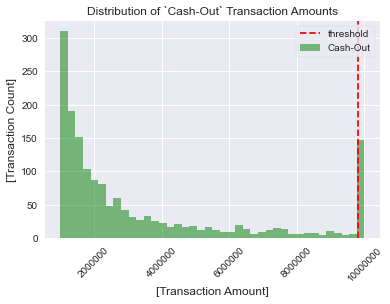

In [41]:
# initialize the plot
fig, ax = plt.subplots()

# plot the scatter plot of all cash out posting amounts
plt.hist(transactions_cash_out[transactions_cash_out["amount"] > 1000000]["amount"], color="green", alpha=0.5, label="Cash-Out", bins=40)

# plot unusual amount threshold
plt.axvline(x=9800000, color="r", linestyle="--", label="threshold")

# add labels of the x- and y-axis
plt.ylabel("[Transaction Count]", fontsize=12)
plt.xlabel("[Transaction Amount]", fontsize=12)

# format y-axis tick labels
ax.ticklabel_format(style='plain')

# rotate x-axis tick labels
plt.xticks(rotation=45)

# add plot legend
plt.legend(loc="upper right", frameon=True)

# add plot title
plt.title("Distribution of `Cash-Out` Transaction Amounts", fontsize=12);

Ok, from the distribution plot it seems that there is indeed an unexpected high number of transactions evident around the transaction amount of 10 Mio. in local currency. Let's therefore apply a filter for all "CASH_OUT" transactions that are **equal or exceed an amount value of 10 Mio.** in local currency:

In [42]:
# define the amount threshold
threshold = 10000000

# filter the transactions according to the amount threshold 
transactions_cash_out_high_value = transactions_cash_out[transactions_cash_out["amount"] >= threshold]

Determine the total number of filtered "CASH_OUT" transactions that exhibit an unusual high amount:

In [43]:
transactions_cash_out_high_value.shape[0]

142

Let's also visually inspect the first 10 transactions that exhibit an unusual high amount value:

In [44]:
transactions_cash_out_high_value.head(10)

,AUDIT_ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
954,ACA_ID_0000954,4,CASH_OUT,10000000.0,C351297720,10000000.0,0.0,C766681183,0.00,9941904.21,yes,0
214335,ACA_ID_0214335,19,CASH_OUT,10000000.0,C2050703310,10000000.0,0.0,C1622860679,504326.62,10342417.90,yes,0
256117,ACA_ID_0256117,33,CASH_OUT,10000000.0,C29118015,10000000.0,0.0,C1379703840,0.00,10000000.00,yes,0
454383,ACA_ID_0454383,72,CASH_OUT,10000000.0,C1438388258,10000000.0,0.0,C1089455271,81810.42,10081810.42,yes,0
454485,ACA_ID_0454485,82,CASH_OUT,10000000.0,C1079335762,10000000.0,0.0,C615227407,373274.84,10373274.84,yes,0
454511,ACA_ID_0454511,84,CASH_OUT,10000000.0,C824646662,10000000.0,0.0,C1917849910,0.00,10000000.00,yes,0
454533,ACA_ID_0454533,86,CASH_OUT,10000000.0,C538142346,10000000.0,0.0,C557678014,0.00,10000000.00,yes,0
462283,ACA_ID_0462283,96,CASH_OUT,10000000.0,C333142995,10000000.0,0.0,C1990623385,841522.24,10841522.24,yes,0
463493,ACA_ID_0463493,118,CASH_OUT,10000000.0,C1348396248,10000000.0,0.0,C1954217280,0.00,10000000.00,yes,0
497909,ACA_ID_0497909,131,CASH_OUT,10000000.0,C944451895,10000000.0,0.0,C1941053102,179252.82,10179252.82,yes,0


Finally let's extract the filtered transactions into an excel spreadsheet for a further sample based testing by the audit team. Therefore, we will in a first step create a time stamp of the data extract for audit trail purposes:

In [45]:
timestamp = dt.datetime.utcnow().strftime("%Y-%m-%d_%H-%M-%S")

Finally, we extract the filtered transactions to excel to the local filesystem:

In [46]:
# specify the filename of the excel spreadsheet
filename = str(timestamp) + " - ACA_001_analysis_result_unusual_high_amounts.xlsx"

# specify the target data directory of the excel spreadsheet
data_directory = os.path.join('./03_results', filename)

# extract the filtered transactions to excel
transactions_cash_out_high_value.to_excel(data_directory, header=True, index=False, sheet_name="High_Round_Amounts", encoding="utf-8")

Before continuing our analysis let's remove the already extracted **ACA_001** Analytics transactions from the entire population of transactions in the dataset:

In [47]:
transactions_cash_out_filtered = transactions_cash_out[transactions_cash_out["amount"] < threshold]

### 4.2. Analytics: Identification of Unusual High Payment Amounts between Business Partners

<p>
    <table class="table table-bordered table-striped table-hover">
    <col width="150">
        <tr>
            <td><b align="left" style="font-size:16px">ID: </b></td>
            <td><p align="left" style="font-size:16px">ACA 002</p></td>
        <tr>
            <td><b align="left" style="font-size:16px">Name: </b></td>
            <td><p align="left" style="font-size:16px">Unusual High Payments Between Business Partners</p></td>
        <tr>
            <td><b align="left" style="font-size:16px">Risk: </b></td>
            <td><p align="left" style="font-size:16px">Unusual high payments between business partners pose an increased risk of high financial losses.</p></td>
        </tr>
        <tr>
            <td><b align="left" style="font-size:16px">Hypothesis: </b></td>
            <td><p align="left" style="font-size:16px">Outgoing value should follow a general distributional pattern.</p></td>
        </tr>
        <tr>
            <td><b align="left" style="font-size:16px">Data: </b></td>
            <td><p align="left" style="font-size:16px">Population of the 2,237,500 "cash-out" transactions that comprise the 'PaySim' dataset.</p></td>
        </tr>
        <tr>
            <td><b align="left" style="font-size:16px">Analytics: </b></td>
            <td><p align="left" style="font-size:16px">Analysis of the pairwise cash-out transaction volume between counterparties. Identification of pairwise counterparties with the highest cash-out transaction volume. Extraction of the corresponding cash-out transactions from the 'PaySim' dataset for an sample based case-by-case verification.</p></td>
        </tr>
    </table>
</p>

In order to conduct the analysis, let's aggregate the filtered "CASH_OUT" transactions according to the distinct business partner relationships. To create such an multi-column aggregation we will use the `groupby` function of the `Pandas` library:

In [48]:
transactions_cash_out_partners = transactions_cash_out_filtered.groupby(['nameOrig', 'nameDest'])[['amount', 'newbalanceOrig', 'oldbalanceOrg']].sum().reset_index()

Let's now determine the total number of unique business partner relationships:

In [49]:
transactions_cash_out_partners.shape[0]

2237358

Ok, we identified a total volume of 2,237,358 unique business partner relationships. To gain an even more in depth intuition let's review the first 10 rows of the obtained aggregation result:

In [50]:
transactions_cash_out_partners.head(10)

,nameOrig,nameDest,amount,newbalanceOrig,oldbalanceOrg
0,C1000000639,C785826240,244486.46,0.00,8946.00
1,C1000004053,C1128041097,211189.64,0.00,0.00
2,C1000004530,C1643839147,93865.13,257557.59,351422.72
3,C1000005555,C1091802600,233109.79,0.00,20623.00
4,C1000008393,C615558732,58347.84,0.00,10794.00
5,C1000008582,C1462566442,315626.96,0.00,0.00
6,C1000008975,C1919178439,29144.26,0.00,0.00
7,C100001139,C354792404,375996.13,0.00,9976.00
8,C1000012640,C1239707538,367527.28,0.00,0.00
9,C1000013879,C1234389323,516459.01,0.00,153435.60


To identify business partner relations that correspond to high processed amounts, we will sort the aggregation according to the amount in descending order. Therefore, we will use the `sort_values` function of the `Pandas` library:

In [51]:
transactions_cash_out_partners_sorted = transactions_cash_out_partners.sort_values(by=['amount'], ascending=False)

Let's now review the top 10 business partner relationships that correspond to the highest transfered amounts:

In [52]:
transactions_cash_out_partners_sorted.head(10)

,nameOrig,nameDest,amount,newbalanceOrig,oldbalanceOrg
2107053,C887830623,C1319987164,9996886.64,0.0,9996886.64
2052842,C840795008,C1214752539,9977761.05,0.0,9977761.05
48434,C1041938819,C1108421533,9960382.40,0.0,9960382.40
82585,C1071702423,C28783325,9887819.06,0.0,9887819.06
2106872,C887693253,C1459698370,9811104.49,0.0,9811104.49
690984,C1597398625,C1830194909,9772559.35,0.0,9772559.35
161281,C1139926828,C1698433621,9749042.95,0.0,9749042.95
1996404,C792281006,C416165291,9725837.08,0.0,9725837.08
1727645,C560583390,C1975522590,9639524.70,0.0,9639524.70
522992,C1452214555,C1584664836,9639052.83,0.0,9639052.83


Let's also inspect the distribution of the unique business partner relationship amounts:

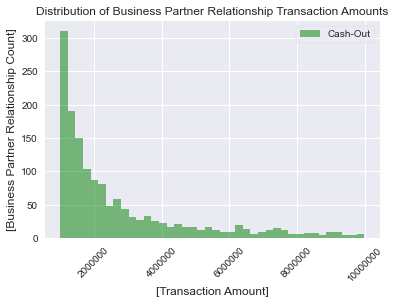

In [53]:
# initialize the plot
fig, ax = plt.subplots()

# plot the scatter plot of all cash out posting amounts
plt.hist(transactions_cash_out_partners[transactions_cash_out_partners["amount"] > 1000000]["amount"], color="green", alpha=0.5, label="Cash-Out", bins=40)

# add labels of the x- and y-axis
plt.ylabel("[Business Partner Relationship Count]", fontsize=12)
plt.xlabel("[Transaction Amount]", fontsize=12)

# format y-axis tick labels
ax.ticklabel_format(style='plain')

# rotate x-axis tick labels
plt.xticks(rotation=45)

# add plot legend
plt.legend(loc="upper right", frameon=True)

# add plot title
plt.title("Distribution of Business Partner Relationship Transaction Amounts", fontsize=12);

Let's apply a filter to determine all unique business partner relationships that correspond to a total transaction volume **equal or exceeding an amount value of 8 Mio.** in local currency:

In [54]:
# define the amount threshold
threshold = 8000000

# filter the business partner relationships according to the amount threshold 
transactions_cash_out_partners_filtered = transactions_cash_out_partners[transactions_cash_out_partners["amount"] > 8000000]

Create a pivot table and visualize the filtered business partner relationships:

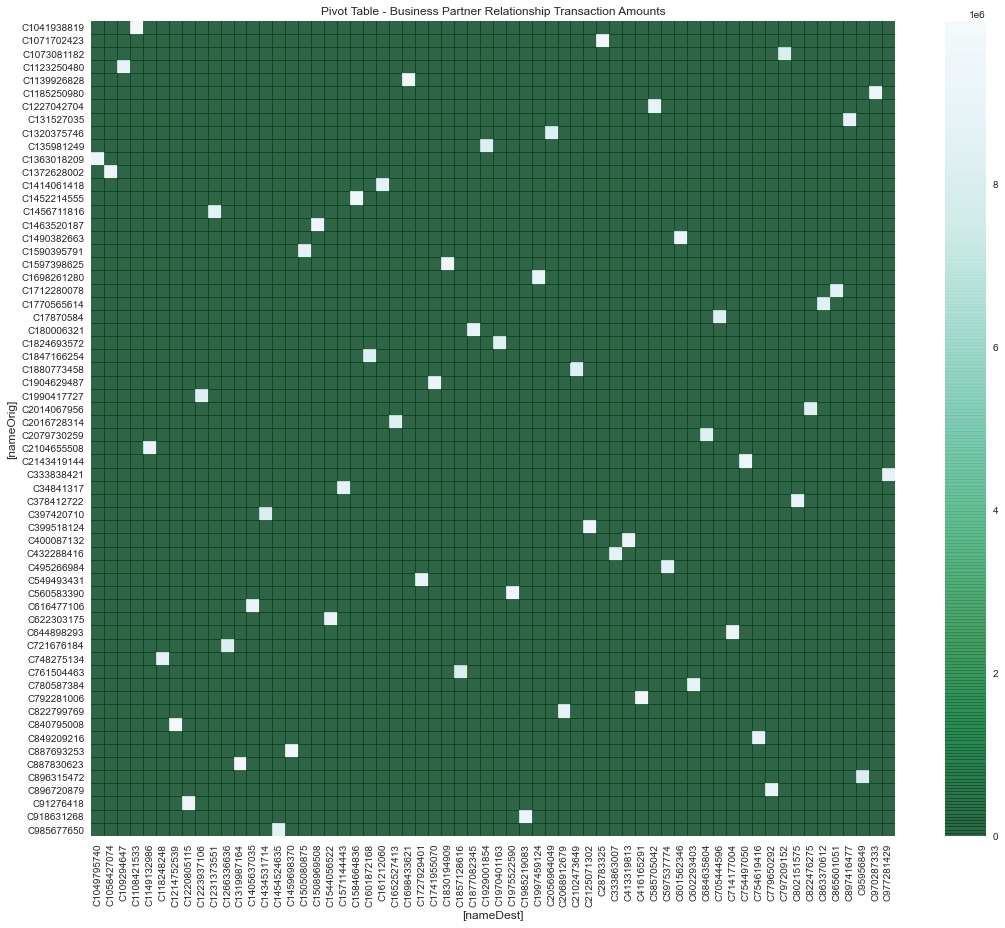

In [55]:
plt.rcParams['figure.figsize'] = [18, 15] # set the plot figure size

# initialize the plot
fig, ax = plt.subplots()

# create pivot table of business partner relationships
pivot = pd.pivot_table(transactions_cash_out_partners_filtered, values='amount', index='nameOrig', columns='nameDest', aggfunc=np.sum, fill_value=0)

# plot the pivot table as seaborn heatmap
sns.heatmap(pivot, square=False, annot=False, cbar=True, cmap='BuGn_r', alpha=0.8)

# add labels of the x- and y-axis
plt.ylabel("[nameOrig]", fontsize=12)
plt.xlabel("[nameDest]", fontsize=12)

# add plot title
plt.title("Pivot Table - Business Partner Relationship Transaction Amounts", fontsize=12);

Filter for all "CASH_OUT" transactions corresponding to the business partner relationship `nameOrig`: "C887830623" and `nameDest`: "C1319987164":

In [56]:
transactions_cash_out_partners_A = transactions_cash_out[(transactions_cash_out['nameOrig'] == 'C887830623') & (transactions_cash_out['nameDest'] == 'C1319987164')]

Inspection of extracted business partner relationship "CASH_OUT" transactions:

In [57]:
transactions_cash_out_partners_A

,AUDIT_ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736129,ACA_ID_2736129,651,CASH_OUT,9996886.64,C887830623,9996886.64,0.0,C1319987164,20429.76,10017316.4,yes,0


Filter for all "CASH_OUT" transactions corresponding to the business partner relationship `nameOrig`: "C840795008" and `nameDest`: "C1319987164":

In [58]:
transactions_cash_out_partners_B = transactions_cash_out[(transactions_cash_out['nameOrig'] == 'C840795008') & (transactions_cash_out['nameDest'] == 'C1214752539')]

Inspection of extracted business partner relationship "CASH_OUT" transactions:

In [59]:
transactions_cash_out_partners_B

,AUDIT_ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
446855,ACA_ID_0446855,46,CASH_OUT,9977761.05,C840795008,9977761.05,0.0,C1214752539,0.0,9977761.05,yes,0


Concatenation of the extracted transactions into a single dataframe using the `concat` function of the `Pandas` library:

In [60]:
transactions_cash_out_partners_all = pd.concat([transactions_cash_out_partners_A, transactions_cash_out_partners_B], axis=0)

Finally let's extract the filtered transactions into an excel spreadsheet for a further sample based testing by the audit team. Therefore, we will in a first step create a time stamp of the data extract for audit trail purposes:

In [61]:
timestamp = dt.datetime.utcnow().strftime("%Y-%m-%d_%H-%M-%S")

Finally, we extract the filtered transactions to excel to the local filesystem:

In [62]:
# specify the filename of the excel spreadsheet
filename = str(timestamp) + " - ACA_002_analysis_result_business_partner_amounts.xlsx"

# specify the target data directory of the excel spreadsheet
data_directory = os.path.join('./03_results', filename)

# extract the filtered transactions to excel
transactions_cash_out_partners_all.to_excel(data_directory, header=True, index=False, sheet_name="Business_Partner_Amounts", encoding="utf-8")

### Lab Assignments:

We recommend you to try the following exercises as part of the lab:

**1. Analyze the "TRANSFER" transactions with regard to transactions with an unusually high amount volume.**

> Analyze the 532,909 "TRANSFER" transactions extracted during the data validation with regard to transactions with an unusually high amount volume. For this, please follow the procedure presented in chapter 4.1. of the notebook. Extract your analysis results into separate CSV file for a downstream individual case-by-case review, if necessary.

In [63]:
# ***************************************************
# INSERT YOUR CODE SOLUTION HERE
# ***************************************************

**2. Analyze the "TRANSFER" transactions with regard to relationships between counterparties with an unusually high amount volume.**

> Analyze the 532,909 "TRANSFER" transactions extracted during the data validation process with regard to relationships between counterparties with an unusually high volume. For this, please follow the procedure presented in chapter 4.2. of the notebook. Extract your analysis results into separate CSV file for a downstream individual case-by-case review, if necessary.

In [64]:
# ***************************************************
# INSERT YOUR CODE SOLUTION HERE
# ***************************************************

### Lab Summary:

In this lab, a step-by-step introduction to rule-based or "red-flag" audit data analysis was presented. In particular, the sub-steps **(1) data import**, **(2) data validation**, **(3) data preparation** and **(4) data analysis** were covered. The structure and analyses presented in this lab can be the starting point for more complex and customized analyses.

You may want to execute the content of your lab outside of the Jupyter notebook environment, e.g. on a compute node or a server. The cell below converts the lab notebook into a standalone and executable python script. Pls. note that to convert the notebook, you need to install Python's `NBConvert` library and its extensions:

In [65]:
# installing the nbconvert library (uncomment the following statements if needed)
# !pip3 install nbconvert
# !pip3 install jupyter_contrib_nbextensions

Let's now convert the Jupyter notebook into a plain Python script:

In [66]:
!jupyter nbconvert --to script aca_lab01.ipynb

[NbConvertApp] Converting notebook aca_lab01.ipynb to script
[NbConvertApp] Writing 34539 bytes to aca_lab01.py
